In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Download the data
json_data = pd.read_json('/Users/schned/Desktop/covid19_infodemic_english_data.json',lines=True)

json_data

# Removing uncessary columns
interaction_data = json_data.drop(columns=[
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'lang',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status',
 'possibly_sensitive',
 'extended_entities','favorited','retweeted'])

json_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,possibly_sensitive,extended_entities
0,2020-03-20 15:35:29+00:00,1241025578527903750,1241025578527903744,For the average American the best way to tell ...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,954568,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-19 02:36:13+00:00,1240467080954228737,1240467080954228736,this is fucking bullshit https://t.co/lfLpuNg9GO,False,"[0, 24]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1505405,False,False,en,1.240119e+18,1.240119e+18,"{'url': 'https://t.co/lfLpuNg9GO', 'expanded':...",{'created_at': 'Wed Mar 18 03:31:09 +0000 2020...,0.0,NaN
2,2020-03-19 19:08:52+00:00,1240716889162018816,1240716889162018816,Can y’all please just follow the government’s ...,False,"[0, 218]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,660762,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-20 18:02:16+00:00,1241062514886090754,1241062514886090752,No offense but the corona virus disappearing b...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,368883,False,False,en,1.203561e+18,1.203561e+18,"{'url': 'https://t.co/5BtaZrejD2', 'expanded':...",{'created_at': 'Sun Dec 08 06:24:59 +0000 2019...,0.0,NaN
4,2020-03-21 19:30:08+00:00,1241447017945223169,1241447017945223168,This is the face of someone who just spent 9 h...,False,"[0, 268]","{'hashtags': [{'text': 'covid19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,445713,False,False,en,NaN,NaN,NaN,NaN,0.0,"{'media': [{'id': 1241447007669104648, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,1235831463121059840,For example: When Trump invents numbers and ig...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.235826e+18,1.235826e+18,...,461,False,False,en,1.233605e+18,1.233605e+18,"{'url': 'https://t.co/mPcXvpQubG', 'expanded':...",{'created_at': 'Sat Feb 29 04:09:36 +0000 2020...,0.0,NaN
487,2020-03-06 16:35:12+00:00,1235967176475111432,1235967176475111424,President Trump's comments about the coronavir...,False,"[0, 247]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,278,False,False,en,1.235957e+18,1.235957e+18,"{'url': 'https://t.co/WFtAdmK3rL', 'expanded':...",{'created_at': 'Fri Mar 06 15:53:49 +0000 2020...,0.0,NaN
488,2020-03-06 22:28:55+00:00,1236056191324864515,1236056191324864512,Drug companies reportedly killed a provision i...,False,"[0, 276]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,176,False,False,en,NaN,NaN,NaN,NaN,0.0,NaN
489,2020-03-06 17:54:16+00:00,1235987075440283648,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,539,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Download the other dataset containing the questions
question_data = pd.read_csv('/Users/schned/Desktop/covid19_infodemic_english_data.tsv', delimiter='\t')
question_data

,tweet_id,text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,1241025578527903750,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,1240467080954228737,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,1240716889162018816,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,1241062514886090754,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,1241447017945223169,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
...,...,...,...,...,...,...,...,...,...
499,1235967176475111432,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
500,1236056191324864515,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
501,1235987075440283648,Does @twitter have a team fighting covid-19 ru...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
502,1235959558058754048,#FOX to cause PANDEMIC #FoxNews is spreading ...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_very_urgent,no_not_harmful,no_not_interesting


In [3]:
# Rename tweet id to use as merge index
interaction_data = interaction_data.rename(columns={'id': 'tweet_id'})
interaction_data

,created_at,tweet_id,retweet_count,favorite_count
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713
...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539


In [4]:
# Merge the interaction data table with the question data table on shared 'tweet_id' index.
data = interaction_data.merge(question_data, how='inner', on='tweet_id')

# Rename misinformation question columns for easier use.
data = data.rename(columns={'q1_label': 'q1', 'q2_label': 'q2', 'q3_label': 'q3', 'q4_label': 'q4', 'q5_label': 'q5', 'q6_label': 'q6', 'q7_label': 'q7'})
data

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7
0,2020-03-20 15:35:29+00:00,1241025578527903750,187425,954568,For the average American the best way to tell ...,no,NaN,NaN,NaN,NaN,no_joke_or_sarcasm,no_not_interesting
1,2020-03-19 02:36:13+00:00,1240467080954228737,333831,1505405,this is fucking bullshit,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
2,2020-03-19 19:08:52+00:00,1240716889162018816,160323,660762,Can y’all please just follow the government’s ...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
3,2020-03-20 18:02:16+00:00,1241062514886090754,154086,368883,No offense but the corona virus disappearing b...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
...,...,...,...,...,...,...,...,...,...,...,...,...
486,2020-03-06 07:35:56+00:00,1235831463121059840,143,461,For example: When Trump invents numbers and ig...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
489,2020-03-06 17:54:16+00:00,1235987075440283648,179,539,Does @twitter have a team fighting covid-19 ru...,no,NaN,NaN,NaN,NaN,no_not_harmful,no_not_interesting


In [5]:
# Showcases the disparity between true and false tweets within the datasets
data['q1'].value_counts()

yes    299
no     192
Name: q1, dtype: int64

In [6]:
# Compare the average retweet count between those flagged verifiably fake or true
retweet_average = data.groupby('q1', as_index=False)['retweet_count'].mean()
retweet_average

,q1,retweet_count
0,no,25700.026042
1,yes,15163.347826


In [7]:
# Compare the average favorite count between those flagged verifiably fake or true
favorite_average = data.groupby('q1', as_index=False)['favorite_count'].mean()   
favorite_average

,q1,favorite_count
0,no,95456.151042
1,yes,55647.391304


In [8]:
# Create a sperate dataset with verifiable tweets.
verifiable_data = data[data.q1 != "no"]
verifiable_data

,created_at,tweet_id,retweet_count,favorite_count,text,q1,q2,q3,q4,q5,q6,q7
4,2020-03-21 19:30:08+00:00,1241447017945223169,126506,445713,This is the face of someone who just spent 9 h...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
5,2020-03-22 08:06:20+00:00,1241637320325029889,128634,715158,Yesterday I knocked on my Tennant's door and t...,yes,2_no_probably_contains_no_false_info,2_no_probably_not_of_interest,1_no_definitely_not_harmful,no_no_need_to_check,no_not_harmful,no_not_interesting
7,2020-03-23 17:13:35+00:00,1242137430322446344,119536,331428,This is Dr. Usama Riaz. He spent past weeks sc...,yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,1_no_definitely_not_harmful,no_too_trivial_to_check,no_not_harmful,no_not_interesting
8,2020-03-19 19:09:28+00:00,1240717039377022977,141115,516085,fun fact: its tradition for europeans to sprea...,yes,5_yes_definitely_contains_false_info,4_yes_probably_of_interest,4_yes_probably_harmful,no_no_need_to_check,yes_xenophobic_racist_prejudices_or_hate_speech,yes_classified_as_in_question_6
11,2020-03-19 16:28:40+00:00,1240676575168921600,100742,322476,"So, the last week I have been battling COVID-1...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,2_no_probably_not_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
...,...,...,...,...,...,...,...,...,...,...,...,...
484,2020-03-05 23:37:48+00:00,1235711139620753408,256,776,"Trump: Corona-flu is not serious, go to work i...",yes,2_no_probably_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities
485,2020-03-05 16:14:52+00:00,1235599671571009536,486,414,"But, but...Trump didn’t prepare for the corona...",yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,no_not_interesting
487,2020-03-06 16:35:12+00:00,1235967176475111432,168,278,President Trump's comments about the coronavir...,yes,4_yes_probably_contains_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,yes_rumor_conspiracy,no_not_interesting
488,2020-03-06 22:28:55+00:00,1236056191324864515,125,176,Drug companies reportedly killed a provision i...,yes,1_no_definitely_contains_no_false_info,4_yes_probably_of_interest,5_yes_definitely_harmful,yes_not_urgent,no_not_harmful,yes_blame_authorities


<AxesSubplot:xlabel='retweet_count', ylabel='q2'>

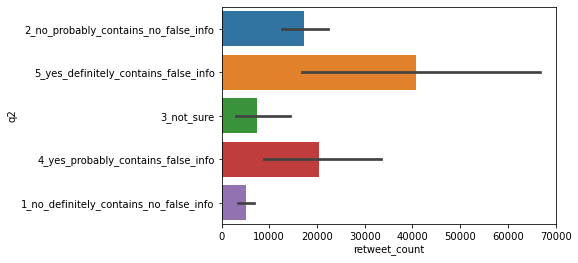

In [9]:
# To what extent does the tweet appear to contain false information?
sns.barplot(x='retweet_count', y='q2', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='favorite_count', ylabel='q2'>

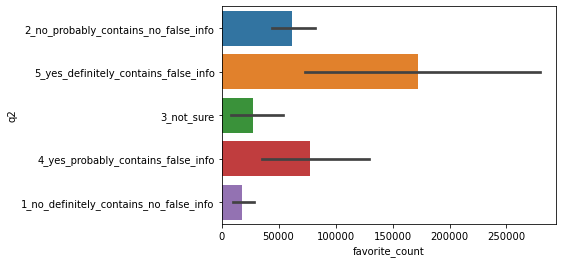

In [10]:
# To what extent does the tweet appear to contain false information?
sns.barplot(x='favorite_count', y='q2', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='retweet_count', ylabel='q3'>

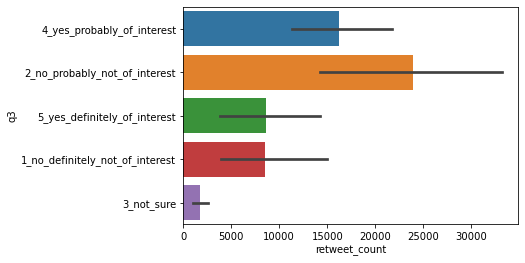

In [11]:
sns.barplot(x='retweet_count', y='q3', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='favorite_count', ylabel='q3'>

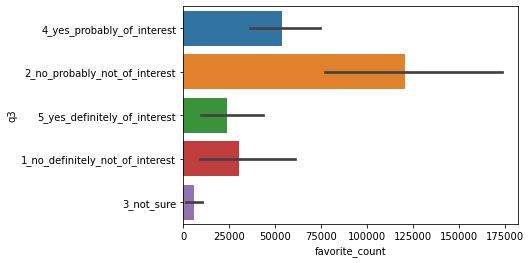

In [12]:
sns.barplot(x='favorite_count', y='q3', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='retweet_count', ylabel='q4'>

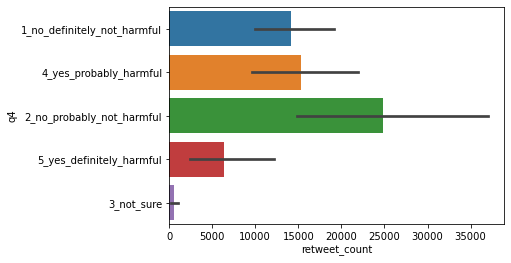

In [13]:
sns.barplot(x='retweet_count', y='q4', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='retweet_count', ylabel='q5'>

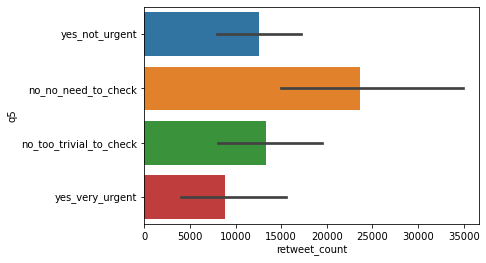

In [14]:
sns.barplot(x='retweet_count', y='q5', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='retweet_count', ylabel='q6'>

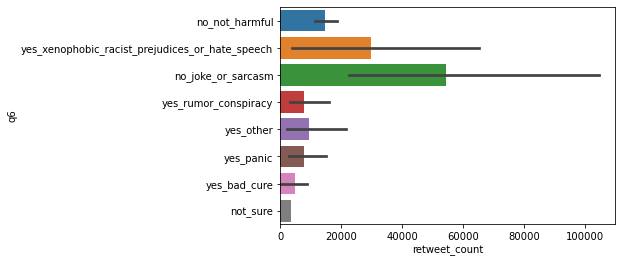

In [15]:
sns.barplot(x='retweet_count', y='q6', data=verifiable_data, orient='h')

<AxesSubplot:xlabel='retweet_count', ylabel='q7'>

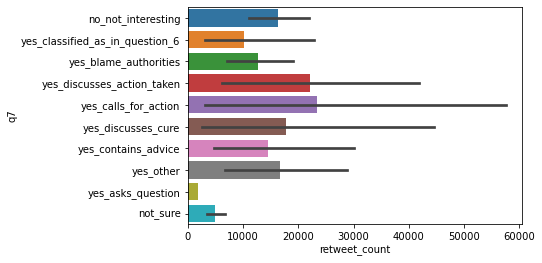

In [16]:
sns.barplot(x='retweet_count', y='q7', data=verifiable_data, orient='h')